# manage utils dir

In [1]:
print(__doc__)

from itertools import islice;
from pprint import pprint;
from sklearn import preprocessing;

import copy; import os;
import sys; import shutil;
import time;

import numpy as np; import pandas as pd;

%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns; sns.set()

Automatically created module for IPython interactive environment


In [2]:
from project_stats_utils import *
from fit_utils import *

None
None


In [3]:
np.random.seed(0)

## Fetch datasets

In [4]:
# ROOT_DIR_PATH = "C:\\Users\\Francesco\\Desktop" # "."
ROOT_DIR_PATH = "."
resources_list = dir_traversal_by_os_walk(root_dir_path=ROOT_DIR_PATH, verbose=0)

In [5]:
df = get_df_from_list_of_os_walk(resources_list)
df.head(5)

,root,dirs,files,files size
0,.,,.gitignore,19
1,.,,Data Space Report (Official) - First Part Desc...,40694
2,.,,Data Space Report (Official) - N-Dimensional A...,255278
3,.,,Data Space Report (Official) - Two-Dimensional...,915132
4,.,,Data Space Report (Official) - Two-Dimensional...,3252947


In [6]:
df_indexed = get_df_from_list_of_os_walk_numeric_indexed(resources_list=resources_list, columns="dirs,files".split(","))
assert df_indexed is not None, "df_indexed is None"

In [7]:
df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, . to .\__pycache__
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dirs    142 non-null    int64
 1   files   142 non-null    int64
dtypes: int64(2)
memory usage: 3.3+ KB


In [8]:
df_indexed.head(5)

,dirs,files
.,8,18
.\.ipynb_checkpoints,0,15
.\figures,8,1
.\figures\.ipynb_checkpoints,0,0
.\figures\DecisionTreeClassifier,0,0


In [9]:
criteria = (df_indexed["dirs"] != 0) & (df_indexed["files"] != 0)
df_indexed[criteria]

,dirs,files
.,8,18
.\figures,8,1
.\models-analyses,6,3
.\models-analyses\cross_validation_analyses,1,4
.\models-analyses\descriptive_statistics_analyses,1,1
.\models-analyses\grid_search_analyses,1,2
.\models-analyses\official_notebooks_tmp,1,4
.\utils,2,8


In [10]:
df_indexed_v2 = get_df_from_list_of_os_walk_numeric_indexed_v2(resources_list=resources_list)
assert df_indexed_v2 is not None, "df_indexed_v2 is None"

In [11]:
df_indexed_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, . to .\__pycache__
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dirs       142 non-null    int64
 1   dirs_size  142 non-null    int64
 2   files      142 non-null    int64
dtypes: int64(3)
memory usage: 4.4+ KB


In [12]:
df_indexed_v2.head(5)

,dirs,dirs_size,files
.,8,16090116,18
.\.ipynb_checkpoints,0,12084369,15
.\figures,8,97830,1
.\figures\.ipynb_checkpoints,0,0,0
.\figures\DecisionTreeClassifier,0,0,0


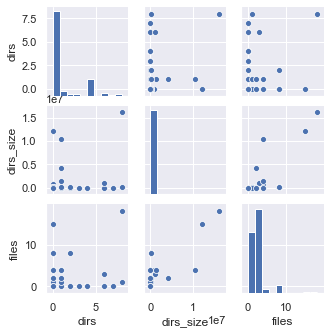

In [13]:
# sns.pairplot(df_indexed_v2, hue='???', size=1.5)
sns.pairplot(df_indexed_v2, height=1.5)

## Perform Machine Learning

In [14]:
criteria = (df_indexed_v2["dirs"] != 0) & (df_indexed_v2["files"] != 0)
# df_tmp = df_indexed[criteria]
df_tmp = df_indexed_v2

In [15]:
y = df_tmp["files"].values
X = df_tmp[["dirs", "dirs_size"]].values

In [16]:
# ax = sns.scatterplot(x="dirs", y="files", data=df_tmp)

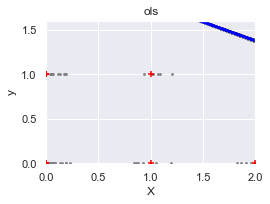

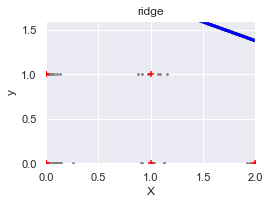

In [17]:
linear_regression_custom(X[:, 0], y, randomize_data=True)

ValueError: cannot reshape array of size 739152 into shape (472,261)

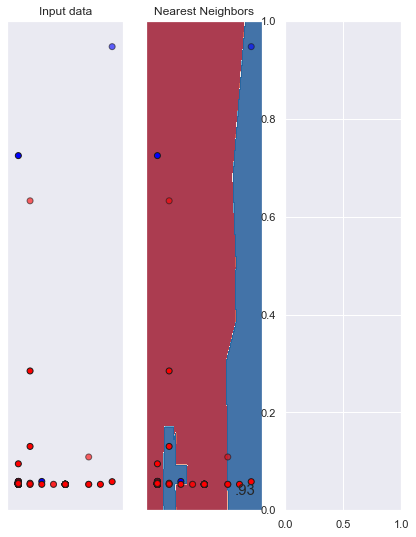

In [18]:
classifier_comparison(X, y)

## Show Some Graphs (Histograms & Pie Charts)

In [ ]:
df = get_df_from_list_of_os_walk_numeric(resources_list=resources_list)
assert df is not None, "df is None"

In [ ]:
df.info()

In [ ]:
# print(df.head(df.shape[0]))
df.head(5)

In [ ]:
df[["dirs", "files"]].agg(['sum', 'max', 'min', 'mean', 'std'])

In [ ]:
df[["dirs", "files"]].describe(include='all')

In [ ]:
res_stats = df[["dirs", "files"]].describe(include='all')
loc_max: int = res_stats.index.get_loc('max')
loc_min: int = res_stats.index.get_loc('min')
max_val = int(max(res_stats.loc[res_stats.index[loc_max]]))
min_val = int(min(res_stats.loc[res_stats.index[loc_min]]))
bins = range(min_val, max_val)
df[["dirs", "files"]].hist(bins=bins)

In [ ]:
type(res_stats.index)

In [ ]:
def file2ext(file_name: str) ->str:
    tmp_res: str = os.path.basename(file_name)
    filename, file_extension = os.path.splitext(tmp_res)
    if len(file_extension) == 0: return "-"
    return file_extension
df = get_df_from_list_of_os_walk(resources_list=resources_list, columns="root,dirs,files,files size", verbose=0)

In [ ]:
df.info()

In [ ]:
# type(df[["files"]].applymap(file2ext))
pd.unique(df[["files"]].applymap(file2ext)["files"].values)

In [ ]:
# type(df[["files"]].applymap(file2ext)["files"].value_counts())
df[["files"]].applymap(file2ext)["files"].value_counts().to_frame().T

In [ ]:
ext_df: pd.DataFrame = df[["files"]].applymap(file2ext)

In [ ]:
meta_data_img = {
    'title': 'Hist',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_pie_by_variable_from_df(ext_df, variable_name="files", fig_name="pie_chart.png", meta_data_img=meta_data_img)

In [ ]:
meta_data_img = {
    'title': 'Hist',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", fig_name="plain_hist.png", meta_data_img=meta_data_img)

In [ ]:
meta_data_img = {
    'title': f'Hist | Normalize',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="Normalize", fig_name="pie_chart.png", meta_data_img=meta_data_img)

In [ ]:
meta_data_img = {
    'title': 'Hist | MinMaxScaler',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="MinMaxScaler", fig_name="pie_chart.png", meta_data_img=meta_data_img)

In [ ]:
meta_data_img = {
    'title': 'Hist | StandardScaler',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="StandardScaler", fig_name="pie_chart.png", meta_data_img=meta_data_img)

In [ ]:
show_histograms_by_scaler_tech(
    ext_df, variable_name="files",
    # rescale_data_techs=["StandardScaler", "MinMaxScaler",], fig_name="all_hists_chart.png")
    rescale_data_techs=["StandardScaler", "MinMaxScaler", "Normalize"],
    figsize=(10, 10),
    fig_name="all_hists_chart.png",
    show_default=True)

## References:

## Scikit-Learn:
### Objects:
    - (StandardScaler) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### Examples:
    - (Ordinary Least Squares and Ridge Regression Variance) https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py
    - (Classifier comparison) https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

